<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/SOM/SOM-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

el proyecto fastsom proporciona una implementación muy completa y eficiente del algoritmo Self Organizing Maps. Utiliza el concepto de tensores a través de la API tensor Flow.

La documentación del proyecto puede ser encontrada en la siguiente URL:
https://kireygroup.github.io/fastsom/index.html#

# SOM Training on IRIS Dataset


El siguiente ejemplo corresponde a la utilización del paquete fastsom para procesar el conjunto de datos Iris.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install fastsom ## instala la librería respectiva

In [3]:
import torch
from fastsom import *
from fastai.tabular.all import *
from sklearn.datasets import load_iris

In [4]:
import matplotlib
#matplotlib.pyplot.style.use('fivethirtyeight')
#with matplotlib.style.context('fivethirtyeight'):
matplotlib.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

### Creating the DataBunch

En esta sección se cargan los datos de Iris en los tensores

In [5]:
def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = iris.data
    y = iris.target
    labels = iris.feature_names
    target_names = iris.target_names
    return x, y, labels, target_names

In [6]:
x, y, labels, target_names = iris()

Let's create a `DataFrame` which we'll convert into a `TabularDataLoaders`:

La columna objetivo se pasa a llamar target.

Y se construye el DataFramed concatenando x que corresponde a las variables independientes, con la variable objetivo pero transformada usando reshape.

In [7]:
df = pd.DataFrame(np.concatenate([x, y.reshape(len(y), 1)], axis=-1), columns=labels+['target'])
df['target'] = df['target'].astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Tabulardatamodel es una serie de funciones que permiten cargar datos para efectuar modelamiento predictivo.
https://docs.fast.ai/tabular.data.html

In [8]:
dls = TabularDataLoaders.from_df(df, cat_names=[], cont_names=labels, procs=[Normalize], y_names=['target'])

### Creating the Learner

The `SomLearner` class can automatically infer the number of features from the `DataLoaders`, and has a default map size of 10x10.

Since IRIS is a small dataset, we might want to use a smaller map:

In [9]:
learn = SomLearner(dls, size=(8, 8), visualize=[SOM_TRAINING_VIZ.CODEBOOK_3D])

### Training the model

In [ ]:
%matplotlib notebook
learn.fit(50)

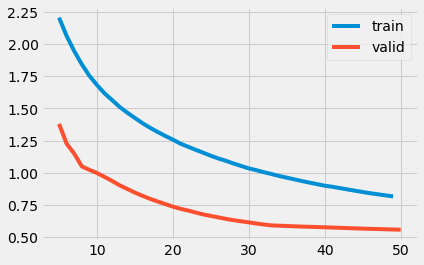

In [12]:
%matplotlib inline
with matplotlib.style.context('fivethirtyeight'): ##load a nice style
  learn.recorder.plot_loss()

### Interpretation

The `SomInterpretation` class provides visualization utilities, to better understand the output of the training process.

In [13]:
interp = SomInterpretation.from_learner(learn)

`show_hitmap` displays a heatmap of hit counts for each map position:

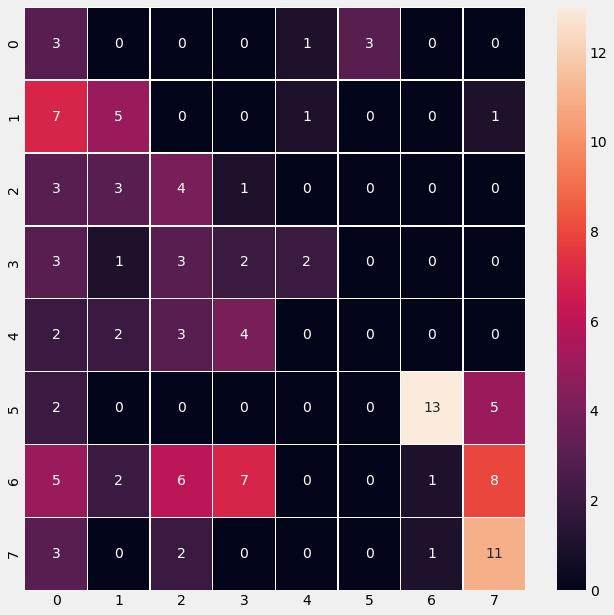

In [25]:
%matplotlib inline
with matplotlib.style.context('fivethirtyeight'): ##load a nice style
  interp.show_hitmap()

`show_preds` displays a topological distribution of classes over the map, if target information is available in the `DataBunch`: 

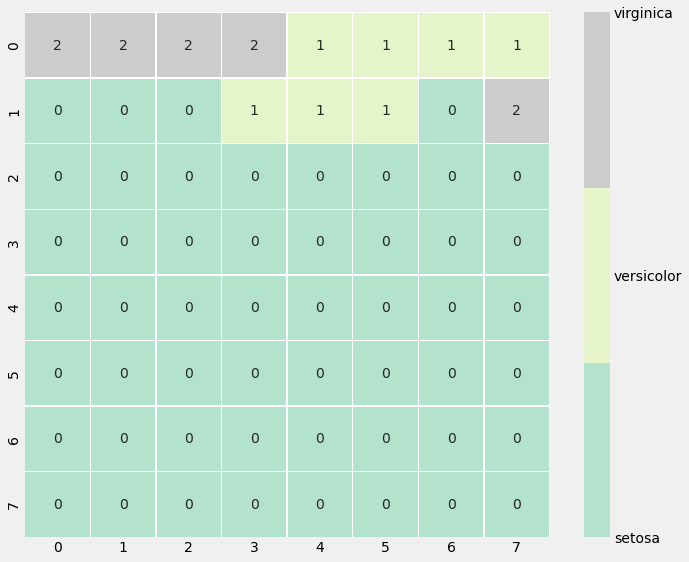

In [26]:
%matplotlib inline
with matplotlib.style.context('fivethirtyeight'): ##load a nice style
  interp.show_preds(class_names=target_names)

`show_feature_heatmaps` shows the per-feature value distribution over the SOM codebooks:

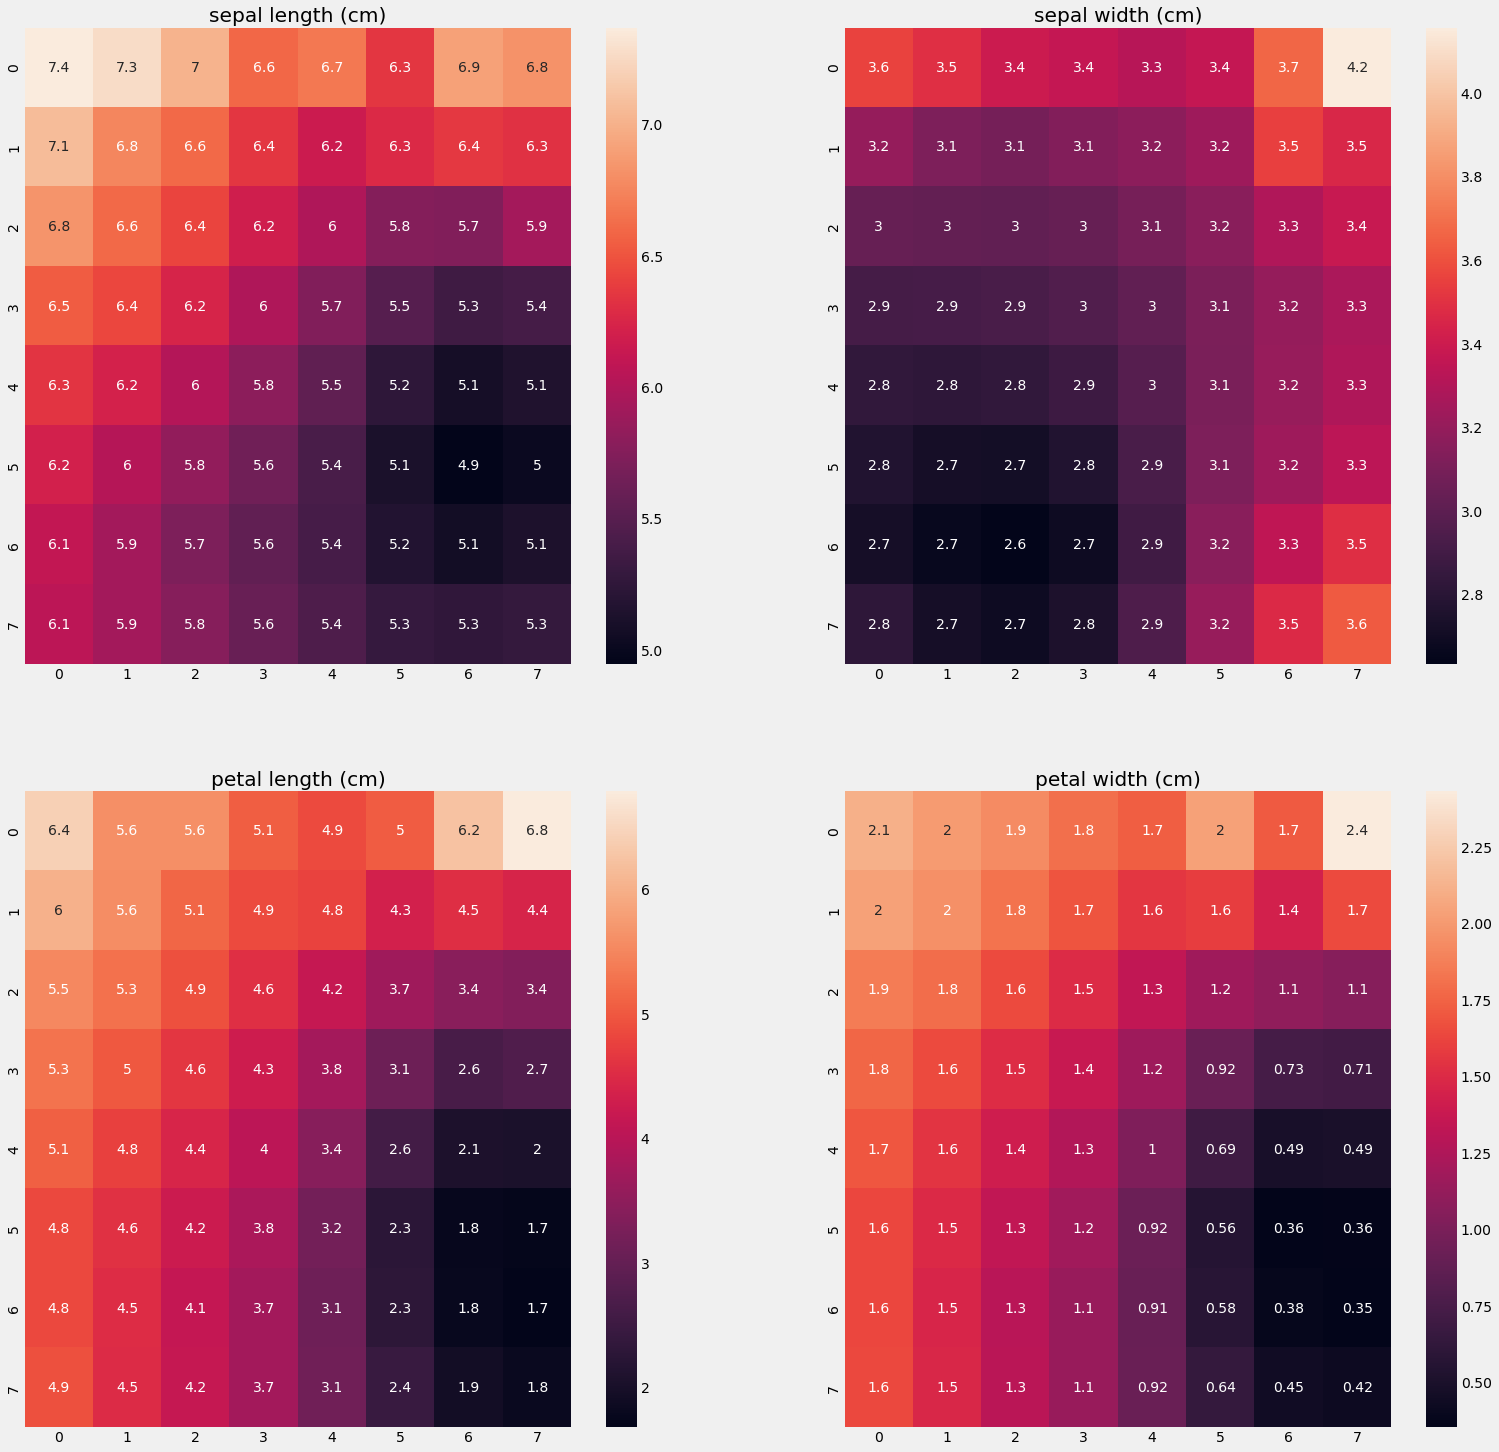

In [27]:
%matplotlib inline
with matplotlib.style.context('fivethirtyeight'): ##load a nice style
  interp.show_feature_heatmaps(recategorize=False, denorm=False)

`show_weights` displays a three-dimensional PCA of the SOM codebook in an RGB image:

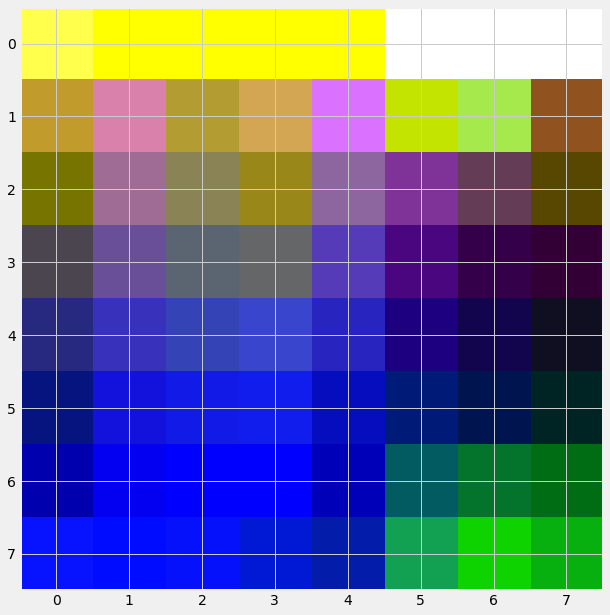

In [28]:
%matplotlib inline
with matplotlib.style.context('fivethirtyeight'): ##load a nice style
  interp.show_weights()